<a href="https://colab.research.google.com/github/Vijay1126/Deep-Learning/blob/master/Lesson_1/MNIST_with_Resnet_152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying to run CNN on the MNIST Tiny dataset after attending the first lesson from the fastai deep learning course. 

Help was taken from https://docs.fast.ai/tutorial.data.htmlfor data processing![alt text](https://)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

Path for the MNIST Tiny dataset 

In [0]:
path = untar_data(URLs.MNIST_TINY); path

PosixPath('/root/.fastai/data/mnist_tiny')

Creating a folder of images from the mentioned path


In [0]:
tfms = get_transforms(do_flip=False)
data = (ImageList.from_folder(path)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))


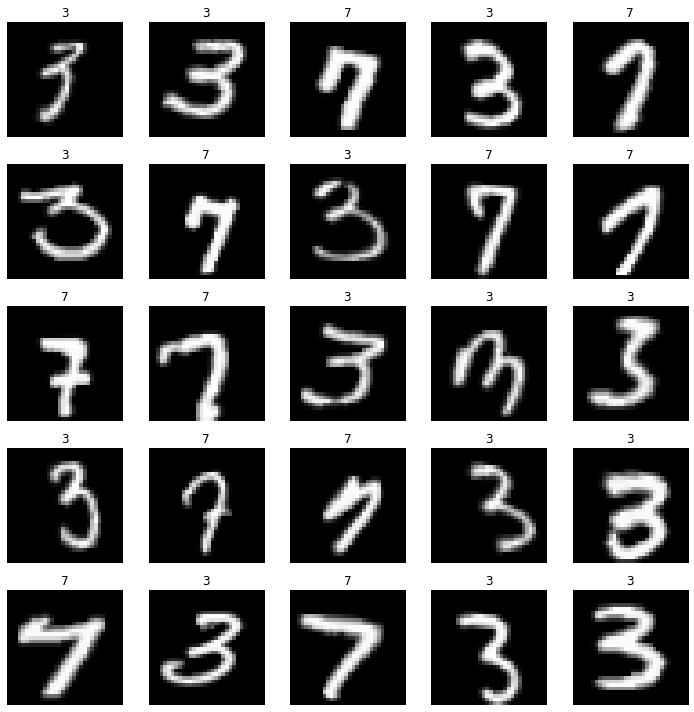

In [0]:
data.show_batch(row = 5, figsize = (10,10))

Creating object for training the classifier


In [0]:
model = cnn_learner(data, models.resnet152, pretrained= True, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


Using the resnet152 cause why not. The metrics here is basically the loss function as far as I understand. It can be the MSE, error rate and so on. The Accuracy is essentially a pre-defined metric for classification of objects belonging to a single class. In this case numbers. If we had to classify objects of different classes then we would opt for accuracy_thresh

In [0]:
model.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,time
0,0.863201,0.329914,0.891273,00:02
1,0.731679,0.215724,0.937053,00:02
2,0.627994,0.281700,0.909871,00:02
3,0.569898,0.186083,0.941345,00:02
4,0.505447,0.160686,0.939914,00:02
5,0.462340,0.204155,0.939914,00:02
6,0.418293,0.187385,0.938484,00:02
7,0.378947,0.287378,0.941345,00:02
8,0.343895,0.270890,0.932761,00:02
9,0.326317,0.167741,0.951359,00:02


Model trainied surprisingly fast for a CNN with 152 layers

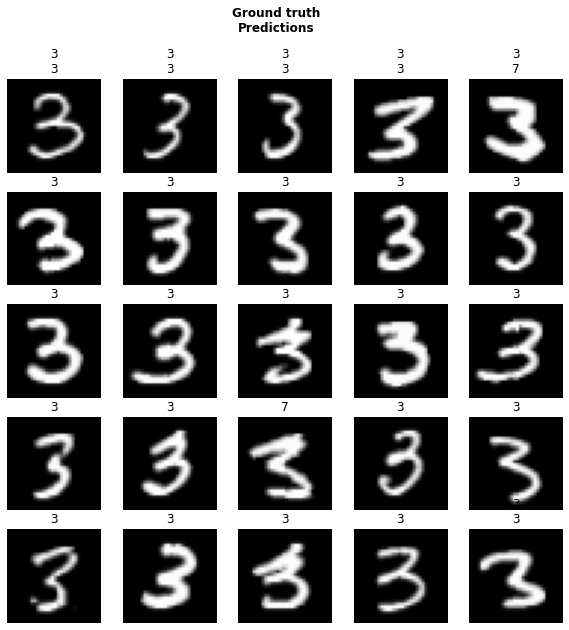

In [0]:
model.show_results(figsize= (10,10))

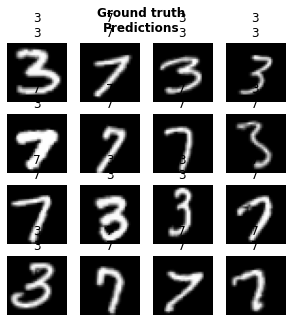

In [0]:
model.show_results(ds_type=DatasetType.Train, rows = 4, figsize = (5,5))